# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [14]:
"""
=====================================
1. IMPORT LIBRARY
=====================================
"""

import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [15]:
#Load Data
df = pd.read_csv('water_potability_raw.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [16]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [18]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


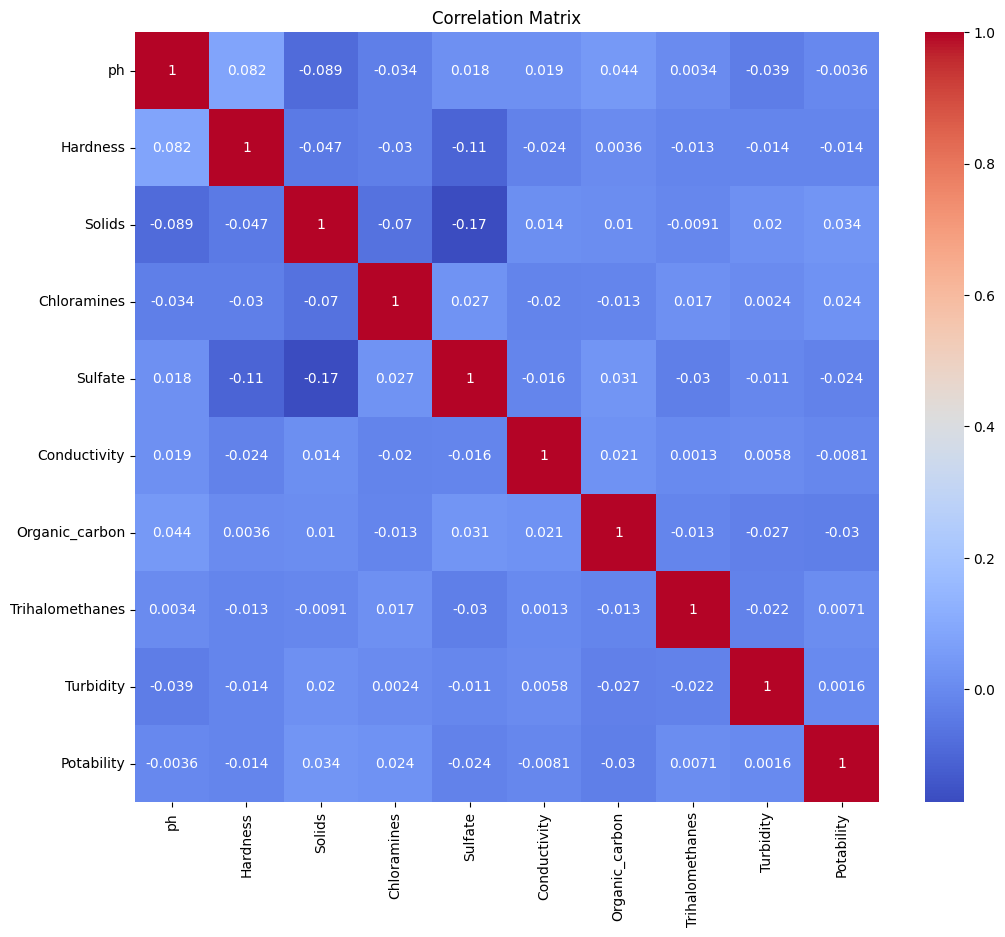

In [19]:
# Membuat Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['number'])
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

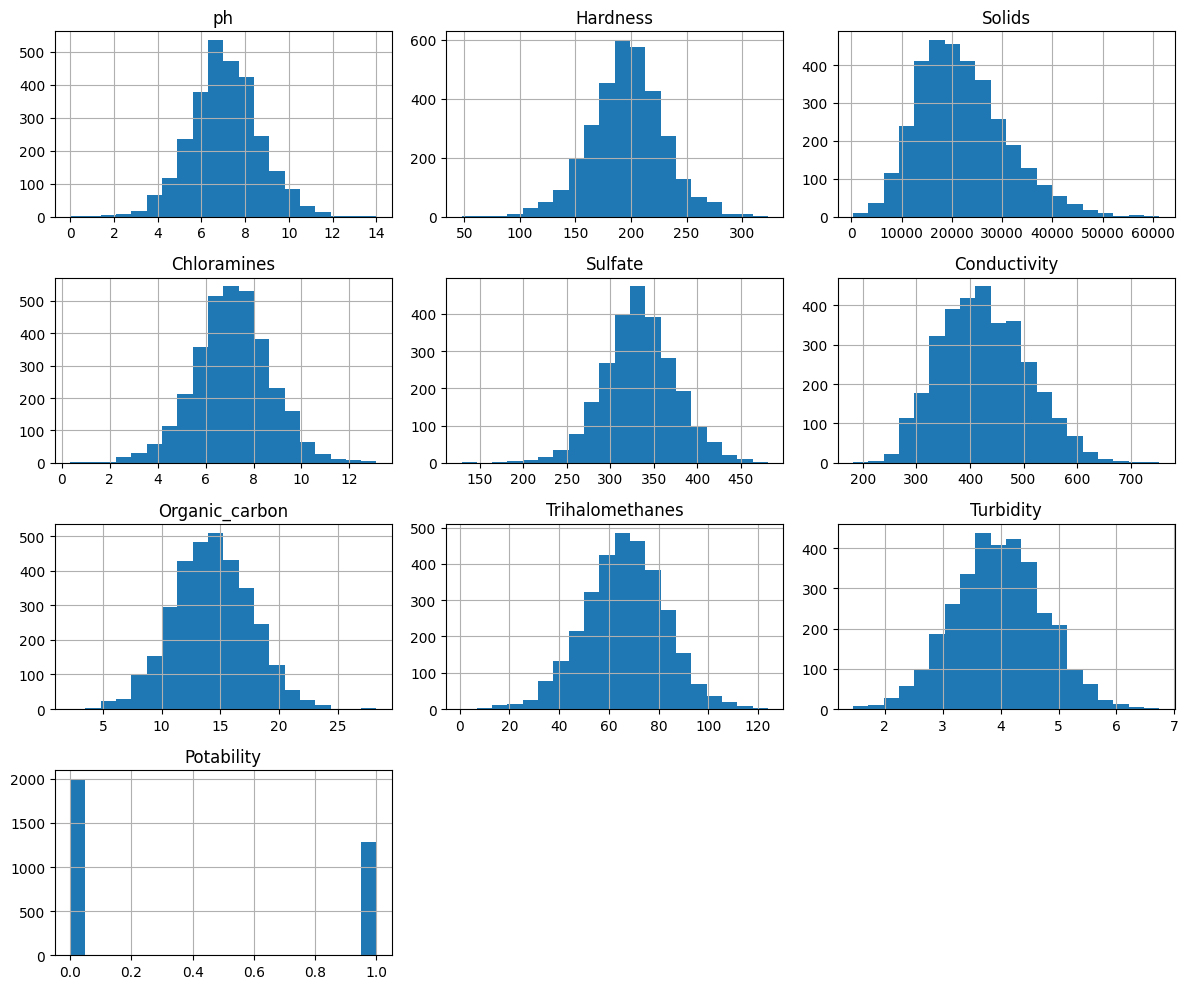

In [20]:
# Membuat Histogram
correlation_matrix.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

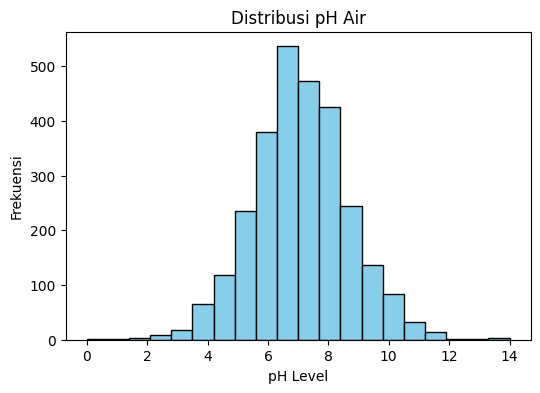

/tmp/ipython-input-4154847314.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Potability", data=df, palette="viridis")


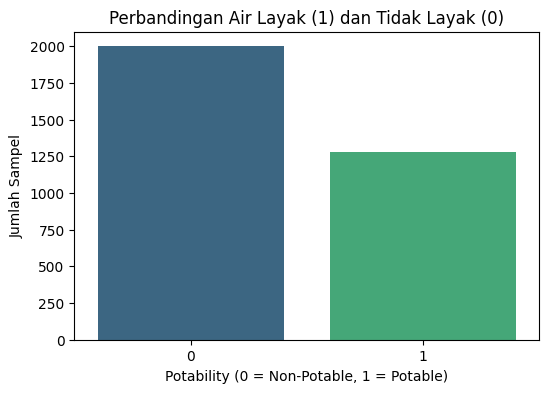

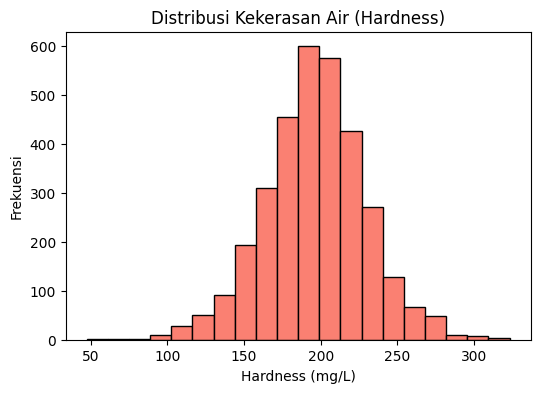

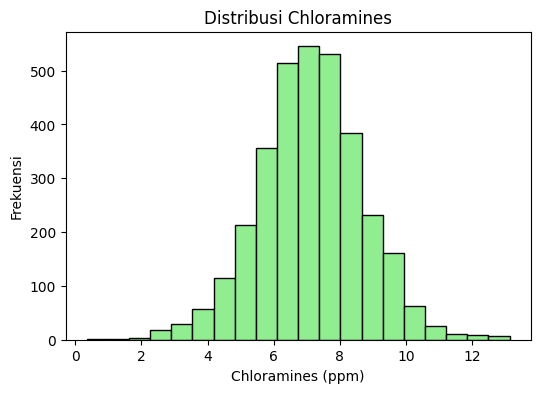

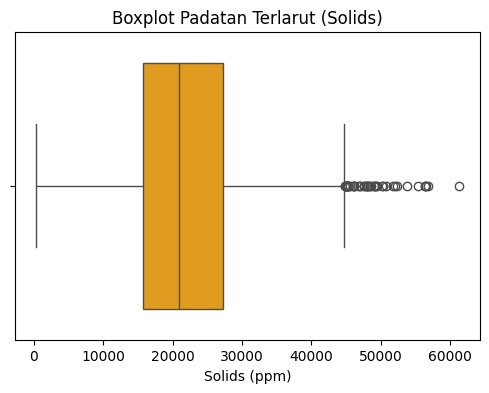

In [21]:
# 1. Distribusi pH Air
plt.figure(figsize=(6,4))
plt.hist(df["ph"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribusi pH Air")
plt.xlabel("pH Level")
plt.ylabel("Frekuensi")
plt.show()

# 2. Distribusi Target Potability (Layak vs Tidak Layak)
plt.figure(figsize=(6,4))
sns.countplot(x="Potability", data=df, palette="viridis")
plt.title("Perbandingan Air Layak (1) dan Tidak Layak (0)")
plt.xlabel("Potability (0 = Non-Potable, 1 = Potable)")
plt.ylabel("Jumlah Sampel")
plt.show()

# 3. Distribusi Kekerasan Air (Hardness)
plt.figure(figsize=(6,4))
plt.hist(df["Hardness"], bins=20, color='salmon', edgecolor='black')
plt.title("Distribusi Kekerasan Air (Hardness)")
plt.xlabel("Hardness (mg/L)")
plt.ylabel("Frekuensi")
plt.show()

# 4. Distribusi Chloramines
plt.figure(figsize=(6,4))
plt.hist(df["Chloramines"], bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribusi Chloramines")
plt.xlabel("Chloramines (ppm)")
plt.ylabel("Frekuensi")
plt.show()

# 5. Boxplot Solids (Total Dissolved Solids) untuk melihat outlier
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Solids"], color='orange')
plt.title("Boxplot Padatan Terlarut (Solids)")
plt.xlabel("Solids (ppm)")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [22]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df = df.dropna()
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [25]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [26]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

In [27]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

condition = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

X = X.loc[condition]
y = y.loc[condition]

df_after_outlier = X.copy()
df_after_outlier["Potability"] = y.values

df_after_outlier.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Gabungkan kembali
df_processed = pd.DataFrame(X_scaled, columns=X.columns)
df_processed["Potabilityy"] = y.values
df_processed.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potabilityy
0,0.863863,0.613811,0.067647,0.655712,0.622869,-0.778976,1.243795,2.188822,0.864568,0
1,1.403253,-0.517328,-0.437203,-0.407480,-0.629396,-0.339223,-0.884149,-2.222631,0.135283,0
2,-1.036925,-0.272149,0.908799,0.294132,-0.186282,-1.815016,-1.861318,-0.743198,-1.860642,0
3,2.190394,1.759449,0.908928,0.272021,1.607992,-1.775179,-0.193809,1.172957,-1.711438,0
4,1.085809,0.239442,-0.975481,-1.801606,-0.812238,0.614211,-0.634938,-0.234530,0.565126,0


In [29]:
df.columns.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']